## LLM  Part 4 :  Embeddings 

**Reference text** 

https://www.manning.com/books/build-a-large-language-model-from-scratch

**Text Corpus** 

The text we will tokenize for LLM training is a short story by Edith Wharton called The Verdict, which has been released into the public domain and is thus permitted to be used for LLM training tasks. The text is available on Wikisource at https://en.wikisource.org/wiki/The_Verdict,

## Concept Note:    Embeddings 

#### What are Embeddings ?

- These are high-dimensional vectors representing tokens in a way that captures their semantic meaning and relationships. 
- Embeddings enable LLMs to understand context and nuances in data, whether it’s text, images, or videos. 
- The quality of embeddings significantly impacts the performance of LLMs. 



### STEP 1 : Generate Tokens for a small test corpus 

In [1]:
import pandas as pd 
import importlib
import tiktoken


# define test corpus 
corpus = "do or do not there is no try !"
print(corpus)

# initialize tokenizer 
tokenizer = tiktoken.get_encoding("gpt2")


# encode
enc_text = tokenizer.encode(corpus)
print(" Length of encoded string is -> ", len(enc_text))

print("      ")

print(" The token ids are : -> ")
print(enc_text)
      
print("      ")     
      
# decode
strings = tokenizer.decode(enc_text)
      
      
print(" The tokens  are : -> ")
print(strings)

do or do not there is no try !
 Length of encoded string is ->  9
      
 The token ids are : -> 
[4598, 393, 466, 407, 612, 318, 645, 1949, 5145]
      
 The tokens  are : -> 
do or do not there is no try !


### STEP 2 : Schematic of the input processing pipeline 


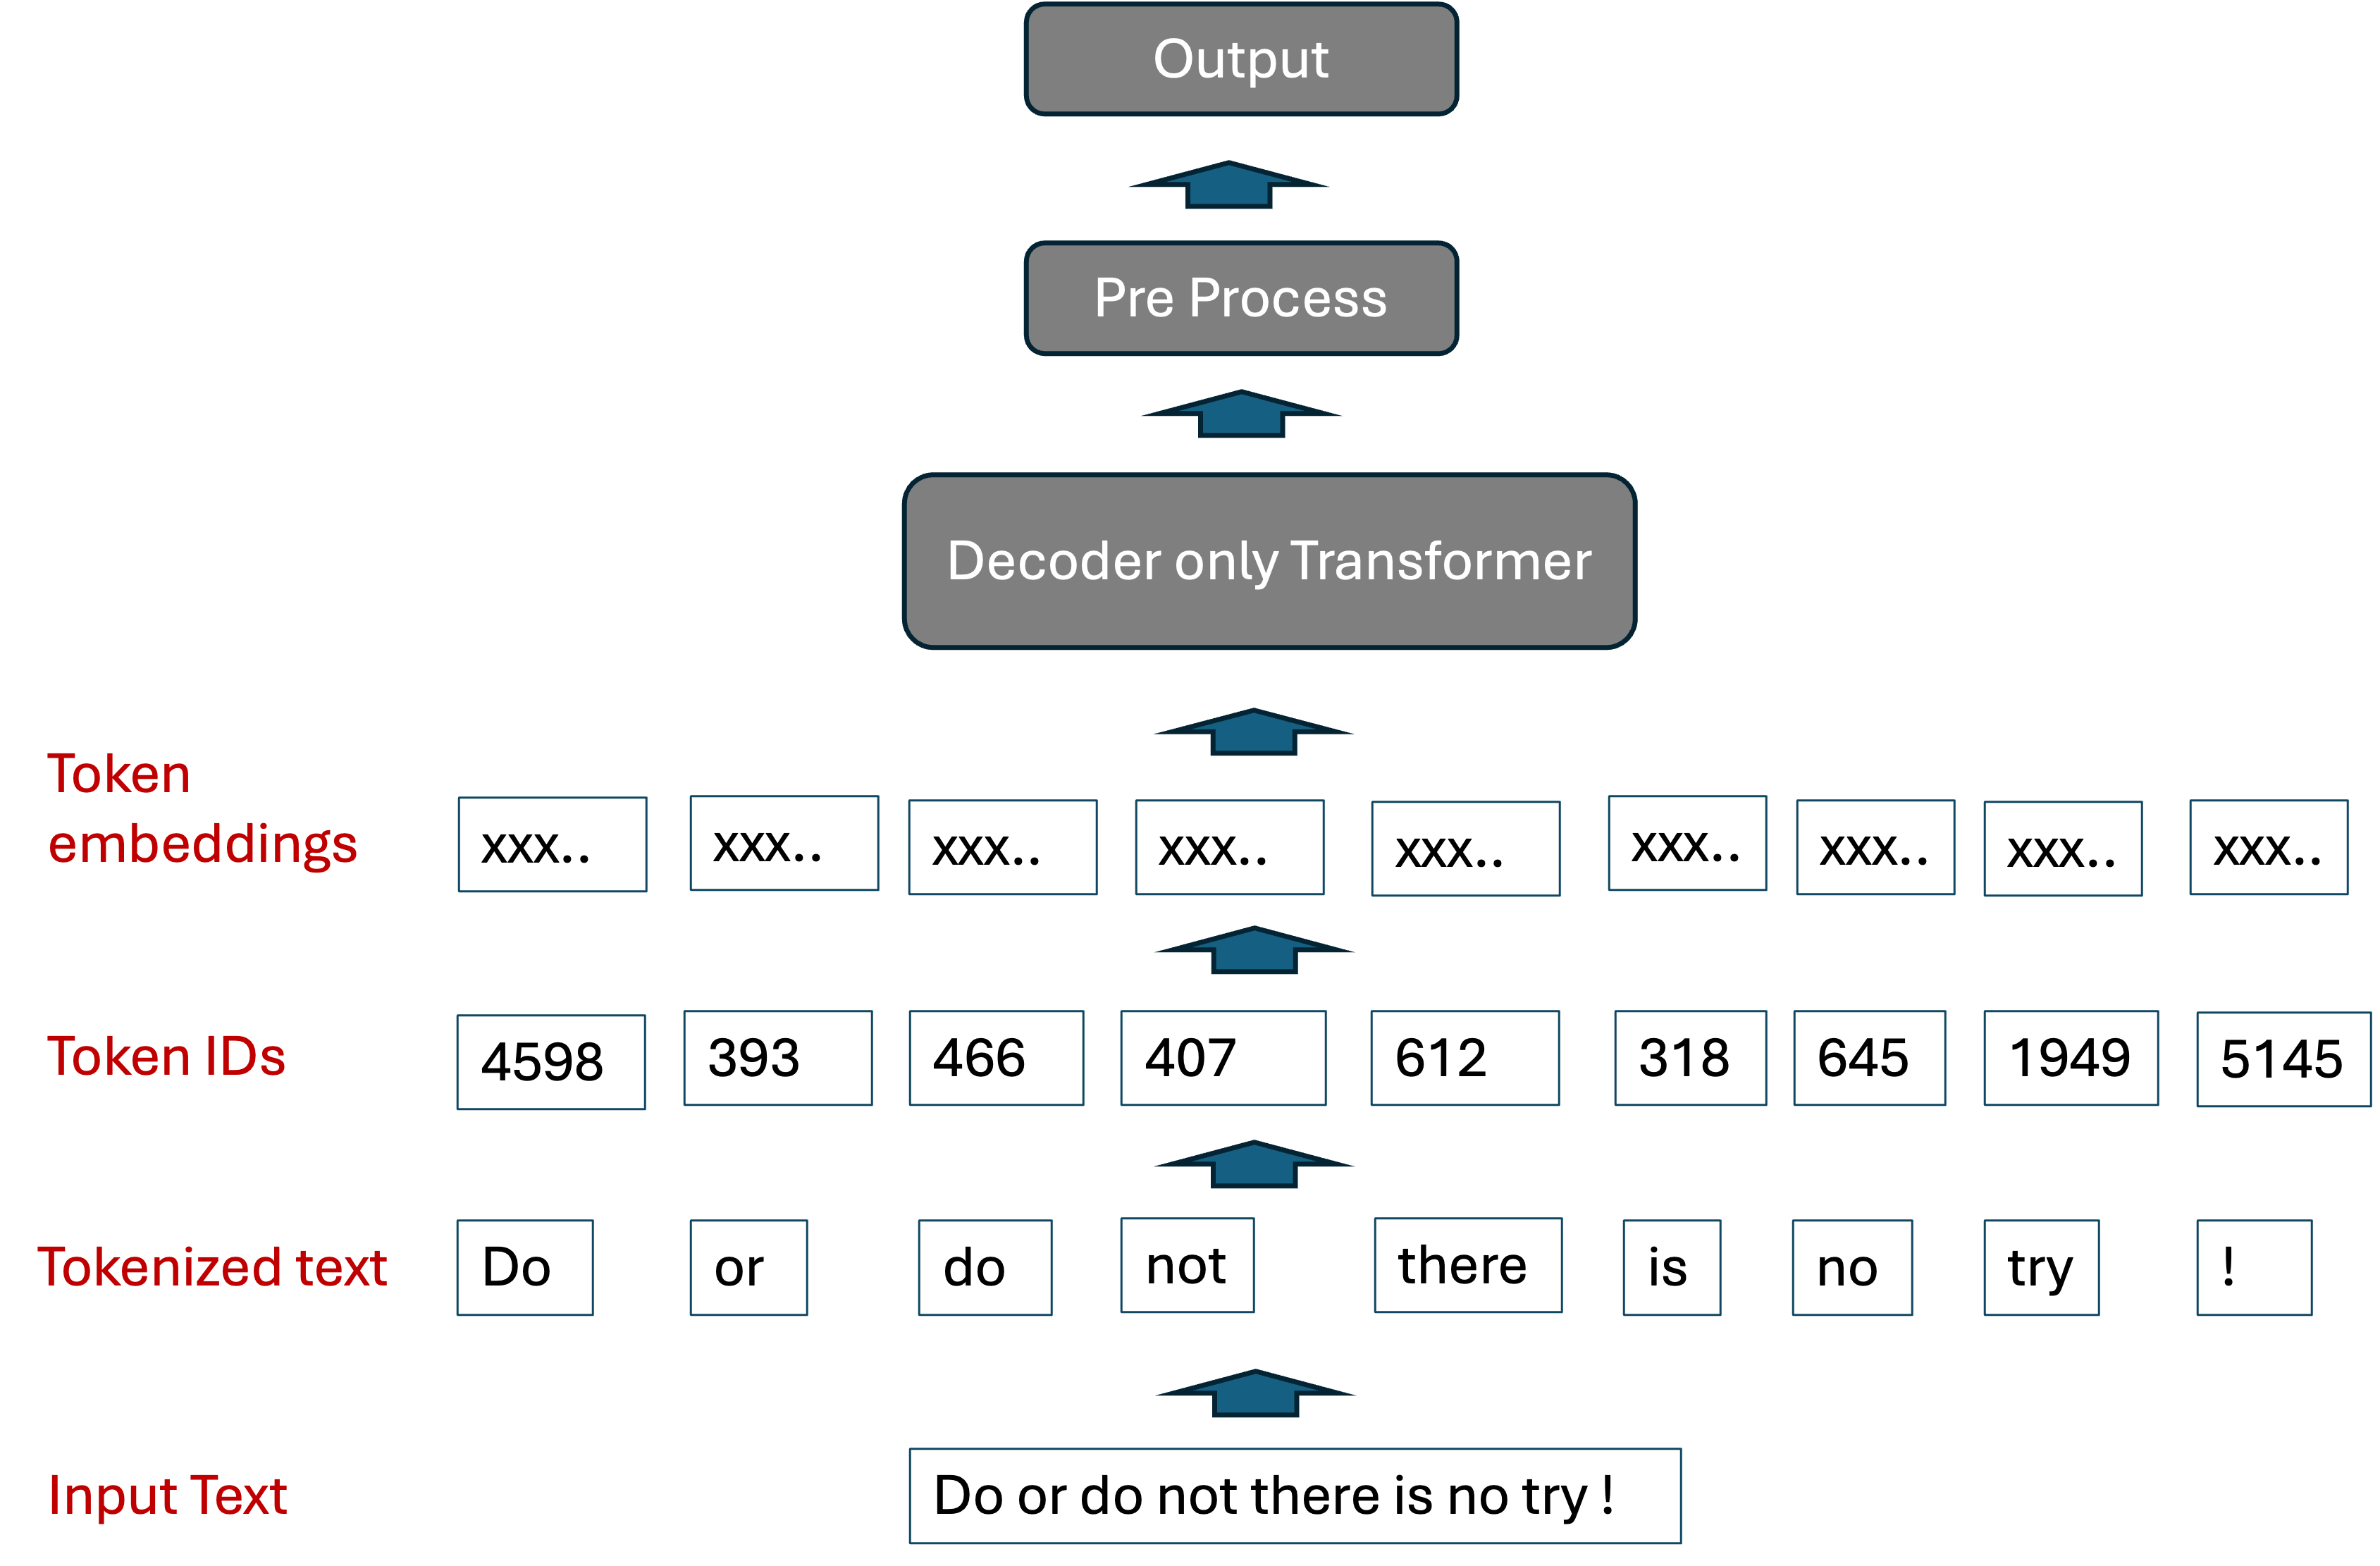

### STEP 3 : Generate an embedding layer 

**Key Steps**

- Define a very short corpus 
- Tokenize the short corpus
- Create a short vocabulary
- Create Encoder 
- define input text 
- Generate Token IDs for input text using encoder 
- Instantiate an embedding layer using pytorch 


#### STEP 3a - Define a very short corpus 

In [2]:
corpus_short = "this is a small world"

#### STEP 3b - Tokenize the short corpus 

- Define text_to_tokens function 
- Tokenize using custom function 

In [3]:
from typing import List
import re

def text_to_tokens(text: str) -> List[str]:
    """
    Create an array of tokens from a given input text data. White spaces are removed.
    Split takes care of special characters , which are treated as tokens also. 

    Parameters:
    tokens (text: str ): A text string which needs to be tokenized 

    Returns:
    List[str]: an list of tokens
    """
    
    # split text into tokens
    result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    
    # remove white spaces 
    result = [item for item in result if item.strip()]
    
    return result

In [4]:
# tokenize 
tokenized = text_to_tokens(corpus_short)

# check 
print(tokenized)

['this', 'is', 'a', 'small', 'world']


#### STEP 3c - Create a short vocab 

- Define create_vocab  function 
- Create vocab from tokens  

In [5]:
from typing import List, Dict

def create_vocab(tokens: List[str], ) -> List [int]:
    """
    Creates a Dictionary which maps a token to its token ID. The token inputs are sorted and duplicates a 
    removed before a dictionary is mapped 

    Parameters:
    tokens (tokens: List[str]): A list of tokens

    Returns:
    Dict[str, int]: a vocabulary dictionary which maps a token to a unique tokenid.

    """
    
    # remove duplicates 
    unq_tokens = list(set(tokens))
    
    # sort 
    srt_tokens = sorted(unq_tokens)
    
    # create vocabulary
    vocabulary = {token:tokenid for tokenid,token in enumerate(srt_tokens)}
    
    return vocabulary

In [6]:
# create vocab 
vocab = create_vocab(tokenized)

# check 
print(vocab)

{'a': 0, 'is': 1, 'small': 2, 'this': 3, 'world': 4}


#### STEP 3d - Define Encoder 

- create function encode
- define short text 
- encode text using encoder based on vocabulary 


In [7]:
import re
from typing import List, Dict

def encode(text: str, vocabulary: Dict[str, int]) -> List[int]:
    """
    Encode the input text into a list of token IDs using the given vocabulary.

    Parameters:
    text (str): The input text string of tokens.
    vocabulary (Dict[str, int]): A dictionary mapping tokens to integer values.

    Returns:
    List[int]: A list of integers representing the token IDs.
    """
    
    # Split the input text into tokens
    result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    
    # remove white spaces 
    tokens = [item for item in result if item.strip()]
    
    
    # Generate the list of token IDs using the vocabulary
    token_ids = []
    for token in tokens:
        if token.strip() and token in vocabulary:
            token_ids.append(vocabulary[token])
        else:
            # Handle unknown tokens if necessary (e.g., append a special token ID or skip)
            # For example, let's append -1 for unknown tokens
            token_ids.append(-99)
    
    return token_ids

#### STEP 3e - Define input text 

In [8]:
text = " this is a small"

#### STEP 3f  - Encode text to generate tokens 

In [9]:
encoded_text = encode(text, vocab)

# check 
print(encoded_text)

[3, 1, 0, 2]


#### STEP 3g - Generate an embedding layer 

For this we need to set the folloiwng parameters 

- Vocabulary Size : we set to the length of the vocab in this case 6 
- Size of Embedding Vector - We choose 3 for brevity 


**Note**
Compare above with 

- 50,257 words in the BPE tokenizer vocabulary 

- The embedding size for GPT3, which has 12,288 dimensions

In [10]:
import torch

/Users/anishroychowdhury/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Observations on the embedding matrix below 

- We can see that the weight matrix of the embedding layer contains small, random values. 
- These values are optimized during LLM training as part of the LLM optimization itself, as we will see in upcoming sections. 
- Moreover, we can see that the weight matrix has six rows and three columns. 
- There is one row for each of the six possible tokens in the vocabulary. 
- And there is one column for each of the three embedding dimensions.

In [11]:
# print vocab 
print("Vocab --> ")
print(vocab)

# set Vocab size 
vocab_size = len(vocab)

# Set size of embedding vector 
output_dim = 3

# Instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility purposes:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

# check 
print(embedding_layer.weight)

Vocab --> 
{'a': 0, 'is': 1, 'small': 2, 'this': 3, 'world': 4}
Parameter containing:
tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239],
        [-0.1085,  0.2103, -0.3908],
        [ 0.2350,  0.6653,  0.3528]], requires_grad=True)


### STEP 4 : Embedding look Ups 

**How does the Vocabulary Relate to the Token Ids and that to the embedding matrix weights**


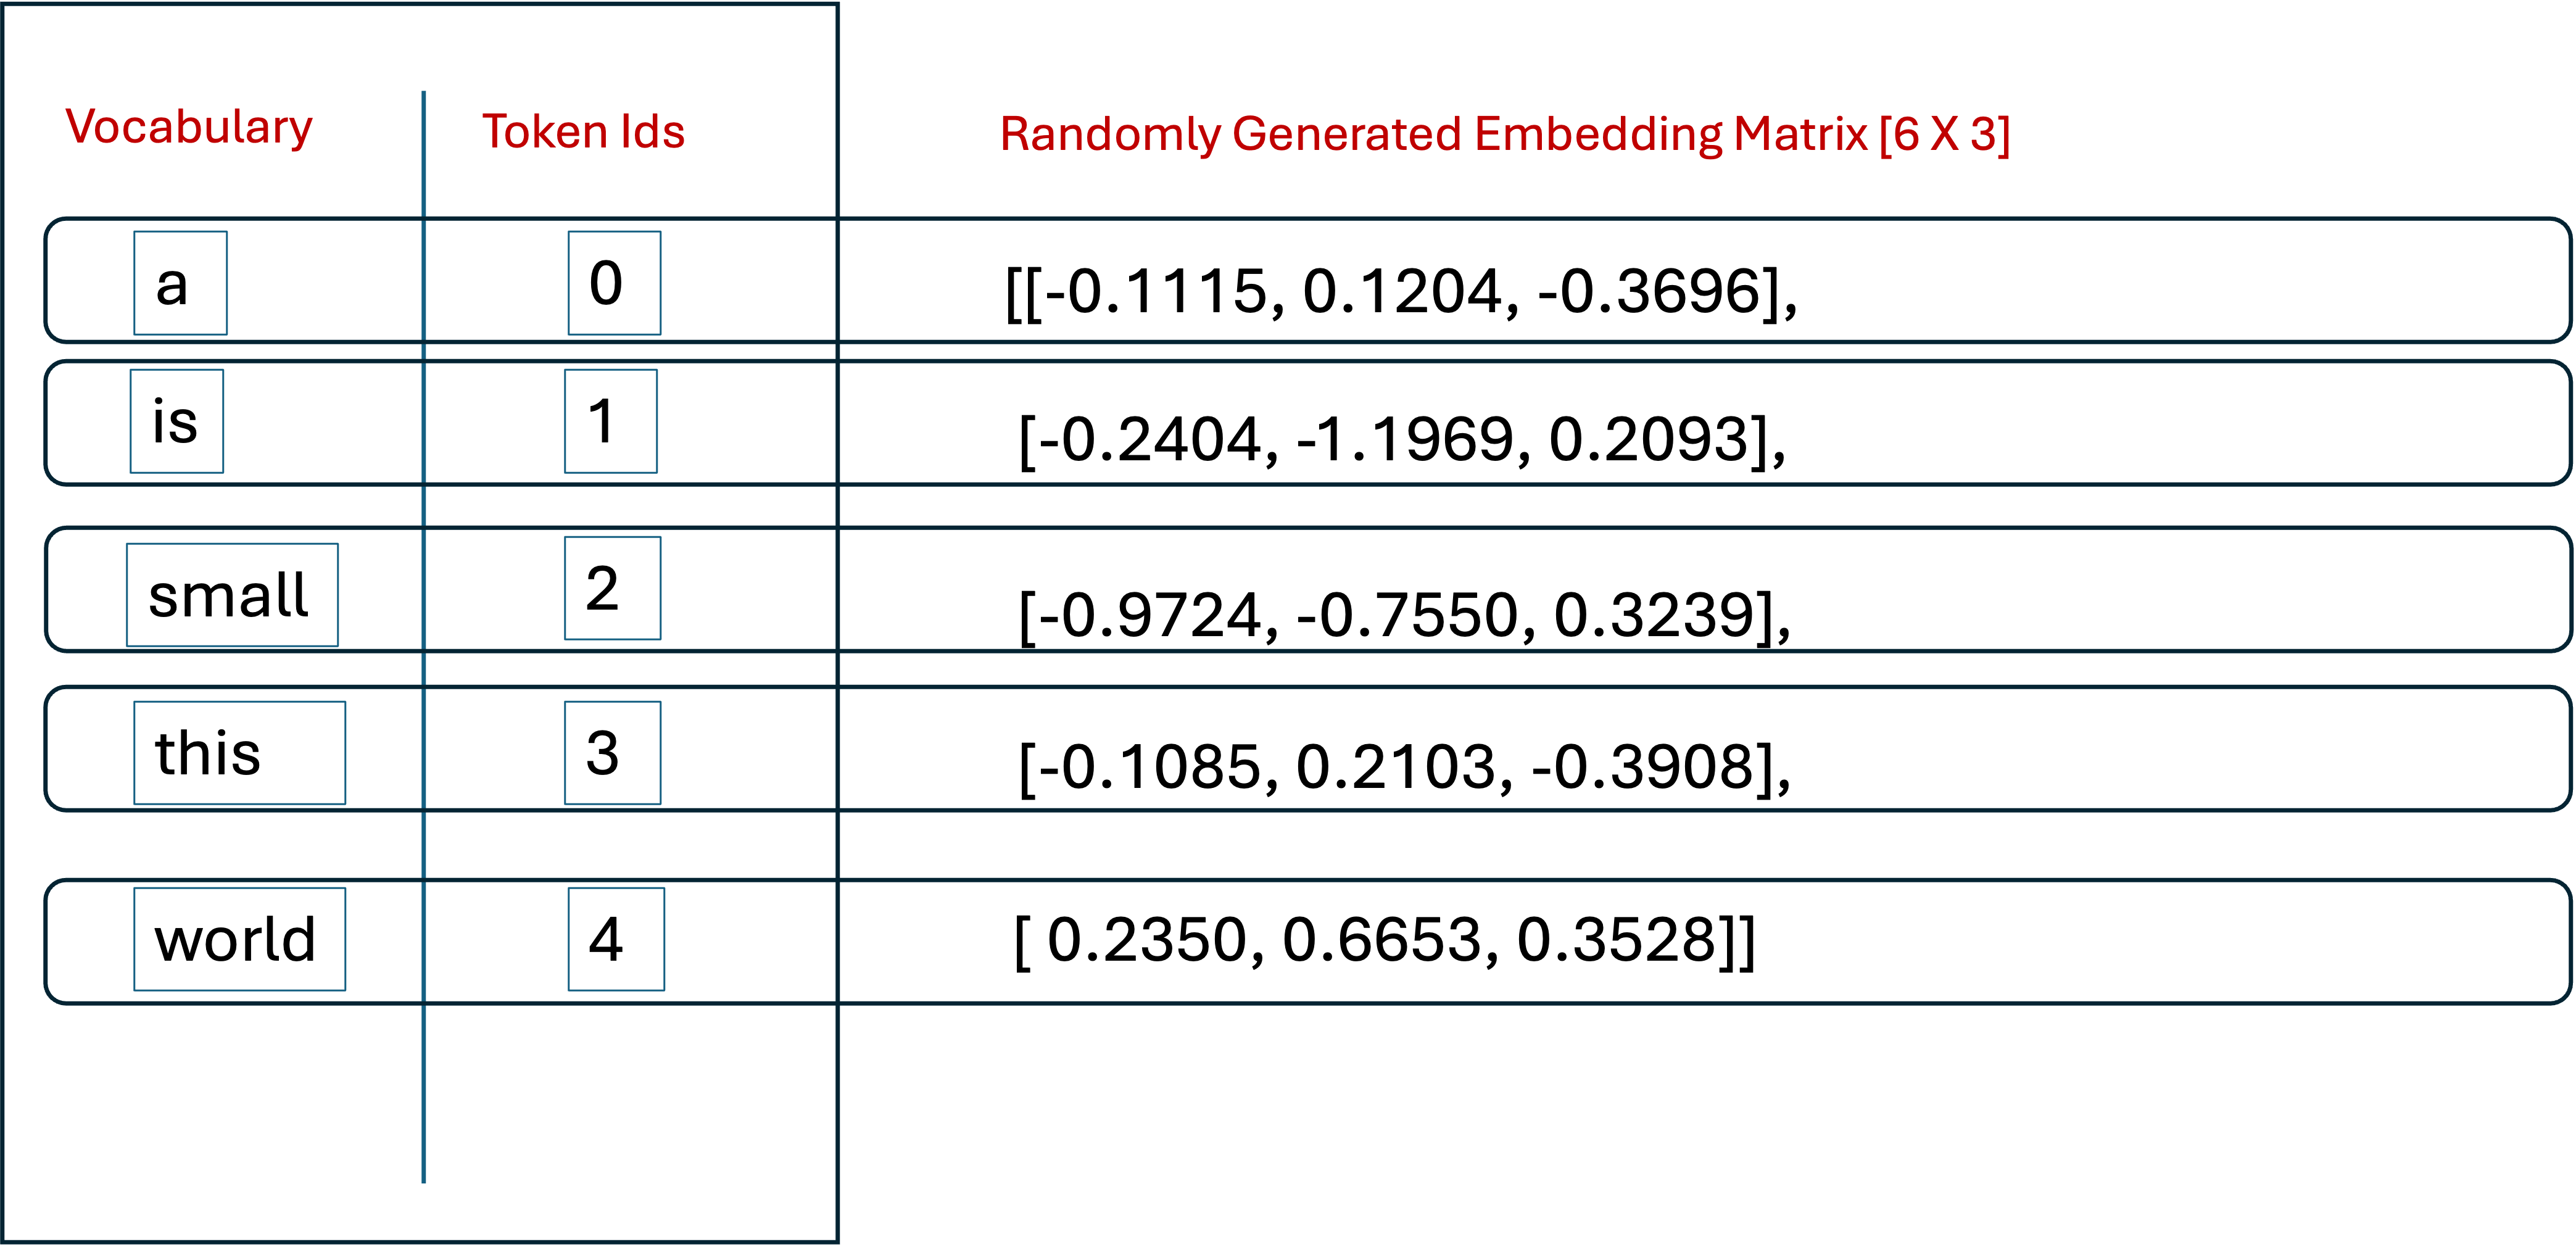

**How are tokens looked up**

- convert text to tokens 
- Based on token iDs - select Appropriate row from Ebedding Matrix 
- Stack up selected rows to generate the embedding matrix for the given token sequence 


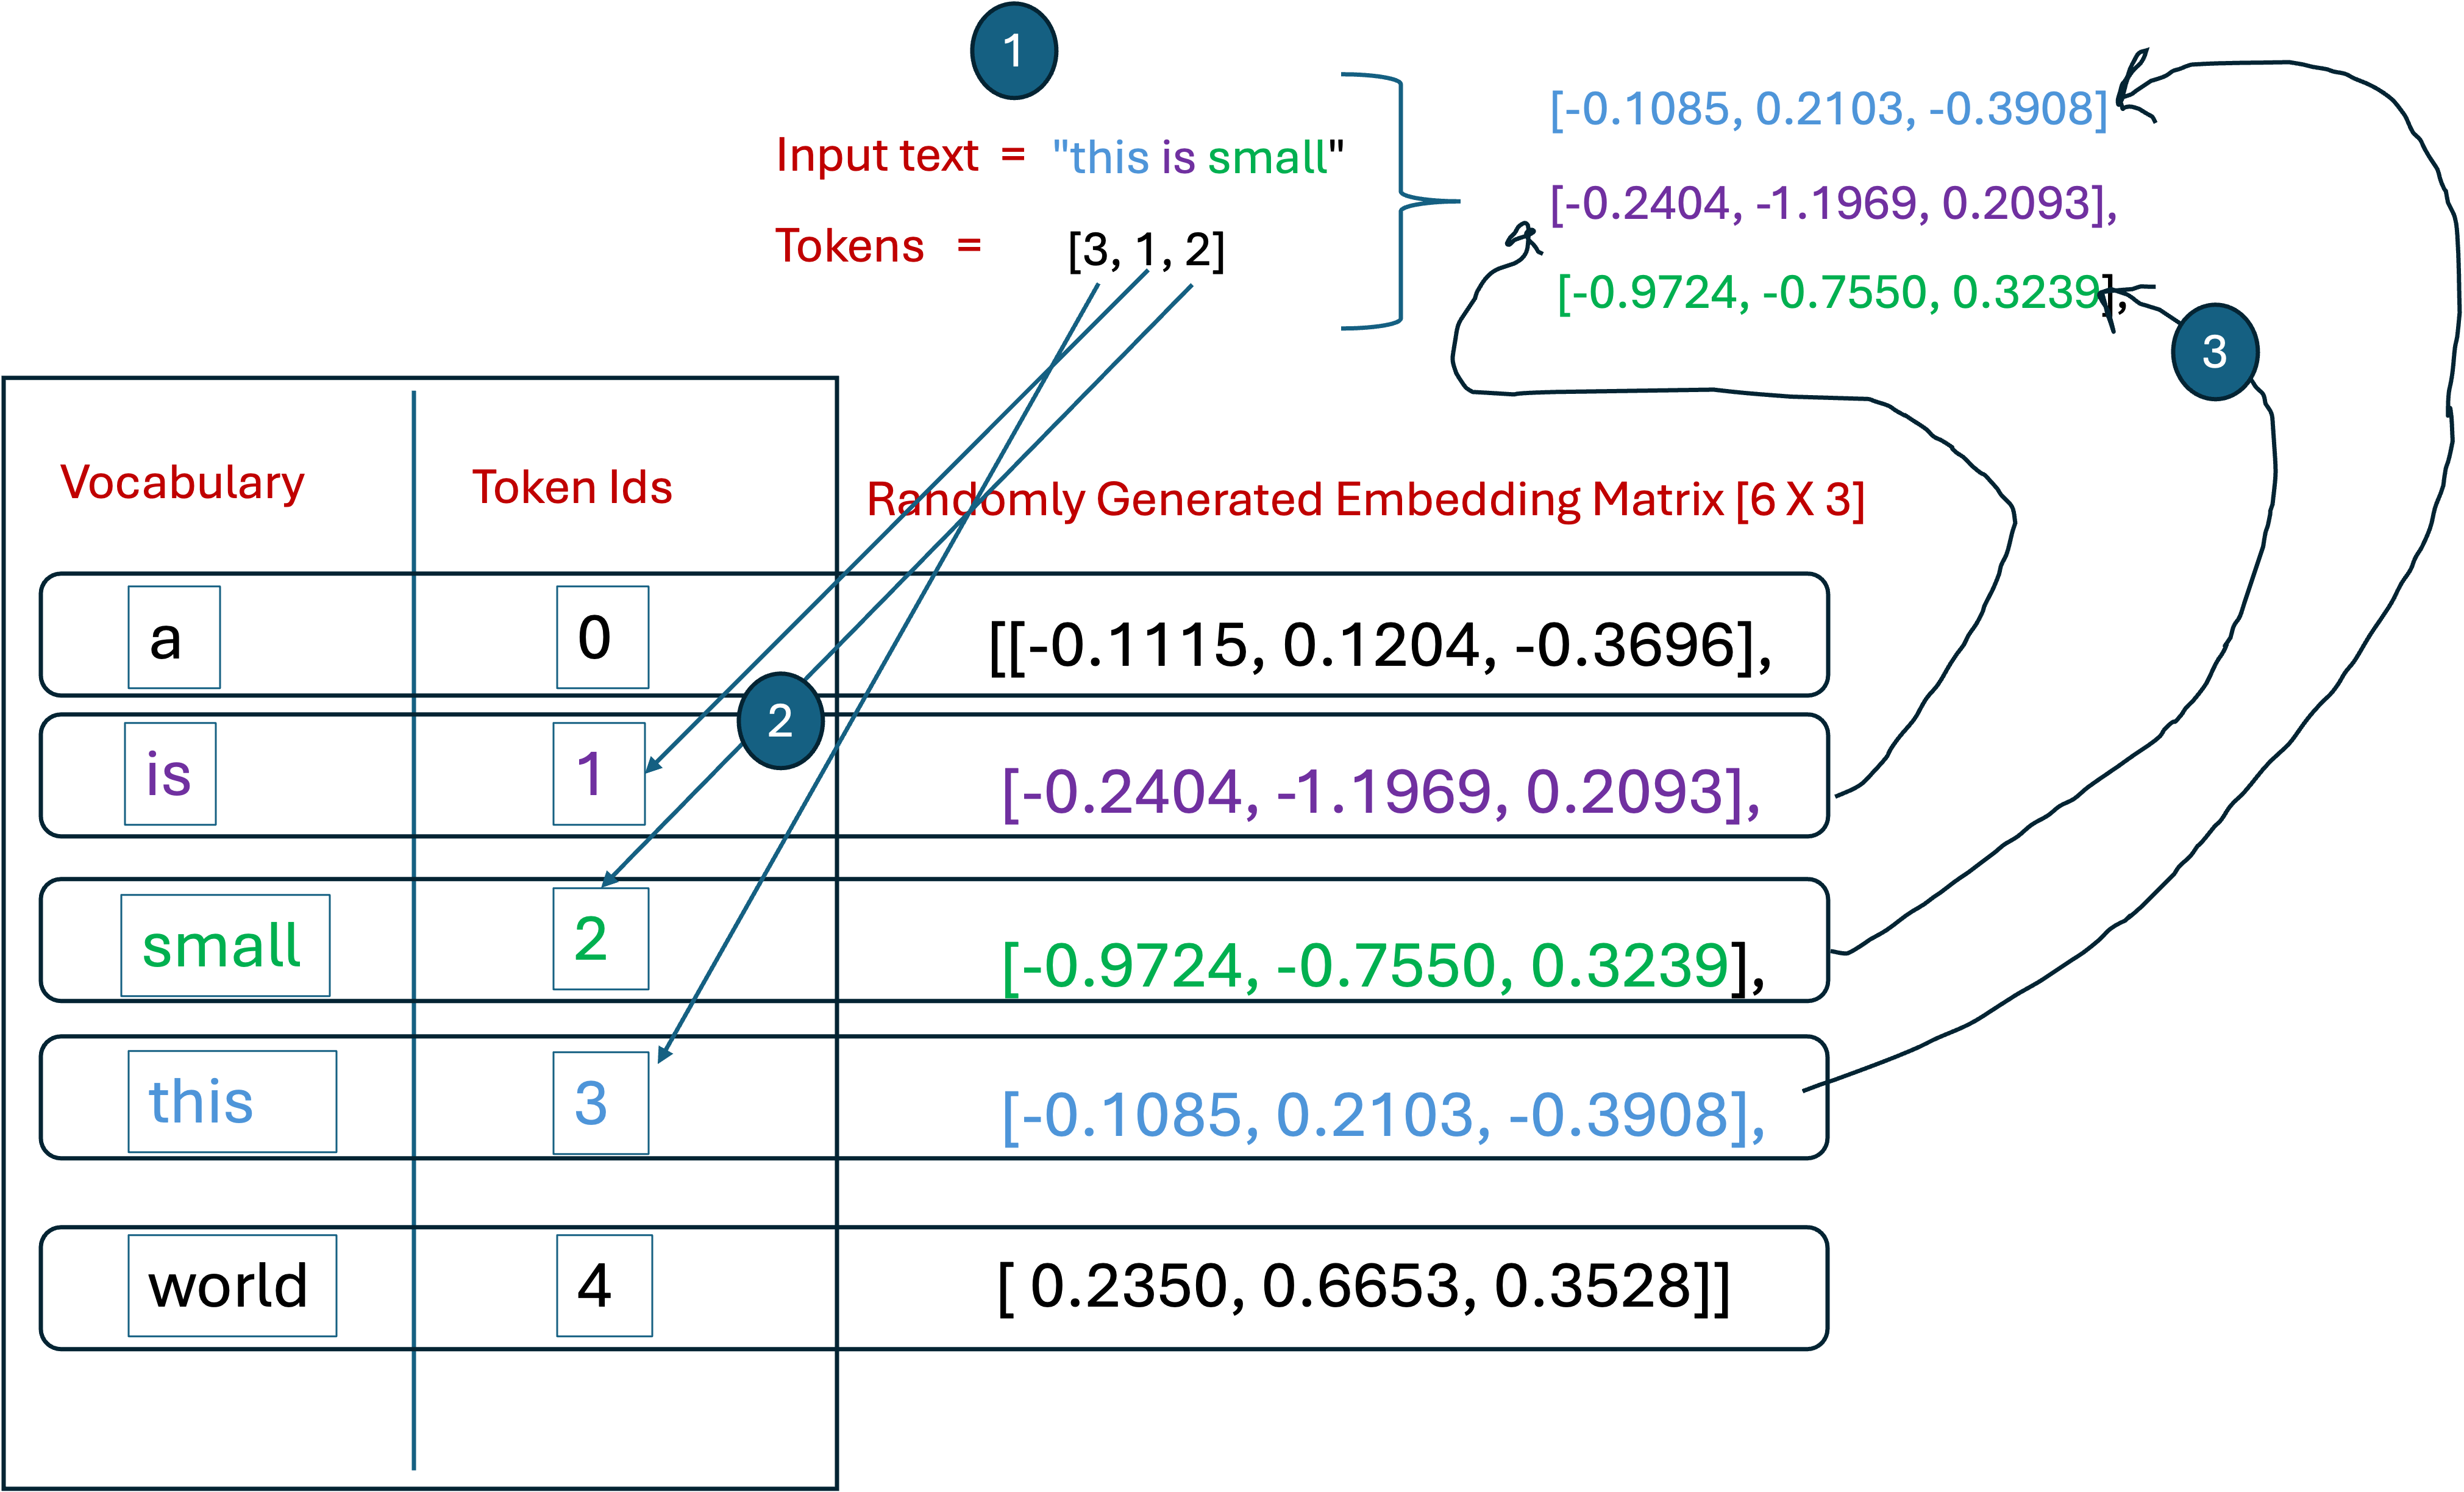


In [12]:
### Input text 
text = "this is small"

# generate token ids
input_ids = torch.tensor(encode(text, vocab))

# check 
print(input_ids)



# check print embedding layer 
print(embedding_layer(input_ids))


tensor([3, 1, 2])
tensor([[-0.1085,  0.2103, -0.3908],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239]], grad_fn=<EmbeddingBackward0>)


### Word Positions Encoding  - Concept Note 

#### Limitations of ordinary embedding 

- A minor shortcoming of LLMs is that their self- attention mechanism, doesn't have a notion of position or order for the tokens within a sequence.

- The way the previously introduced embedding layer works is that the same token ID always gets mapped to the same vector representation, regardless of where the token ID is positioned in the input sequence


#### Consider the below example of repeated tokens 
Fig - reference Ch 2 : Build a LLM from Scratch By Sebastian Raschka 

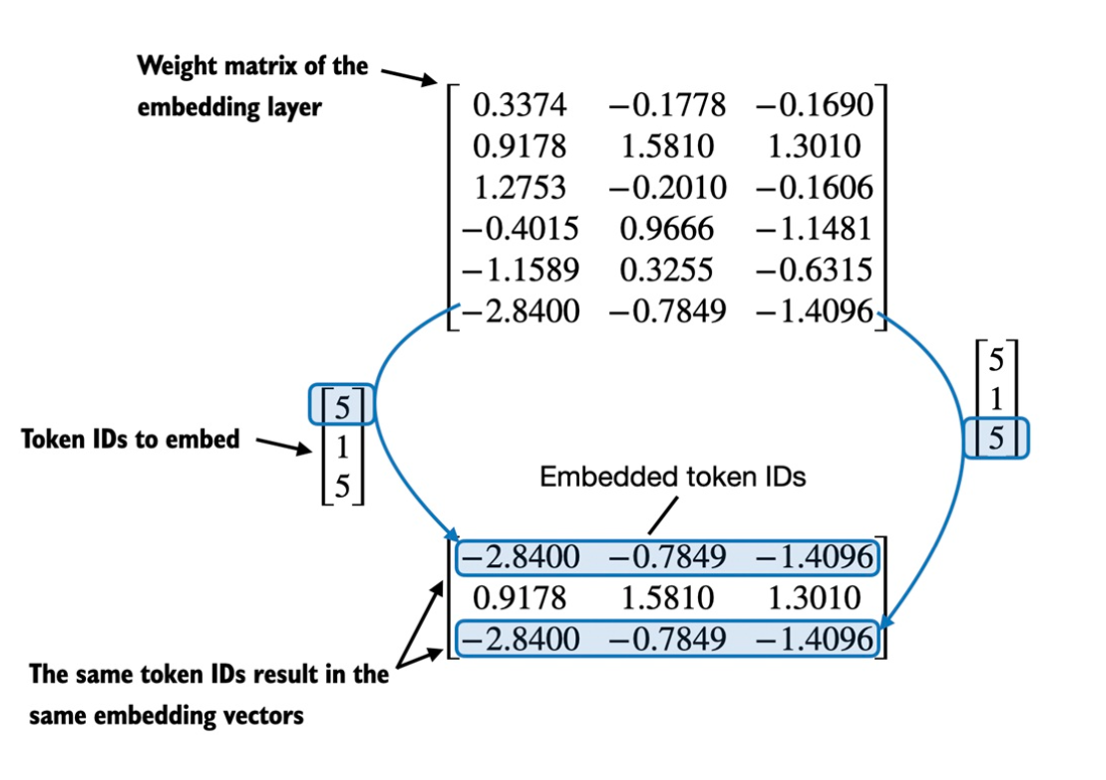


### Concept Note on Positional Embeddings

### How do we do this ?


To achieve this, there are two broad categories of position-aware embeddings: relative positional embeddings and absolute positional embeddings.

**Absolute Positional Embeddings**

Absolute positional embeddings are directly associated with specific positions in a sequence. For each position in the input sequence, a unique embedding is added to the token's embedding to convey its exact location.


### Example : Schematic to show absolute embeddings 

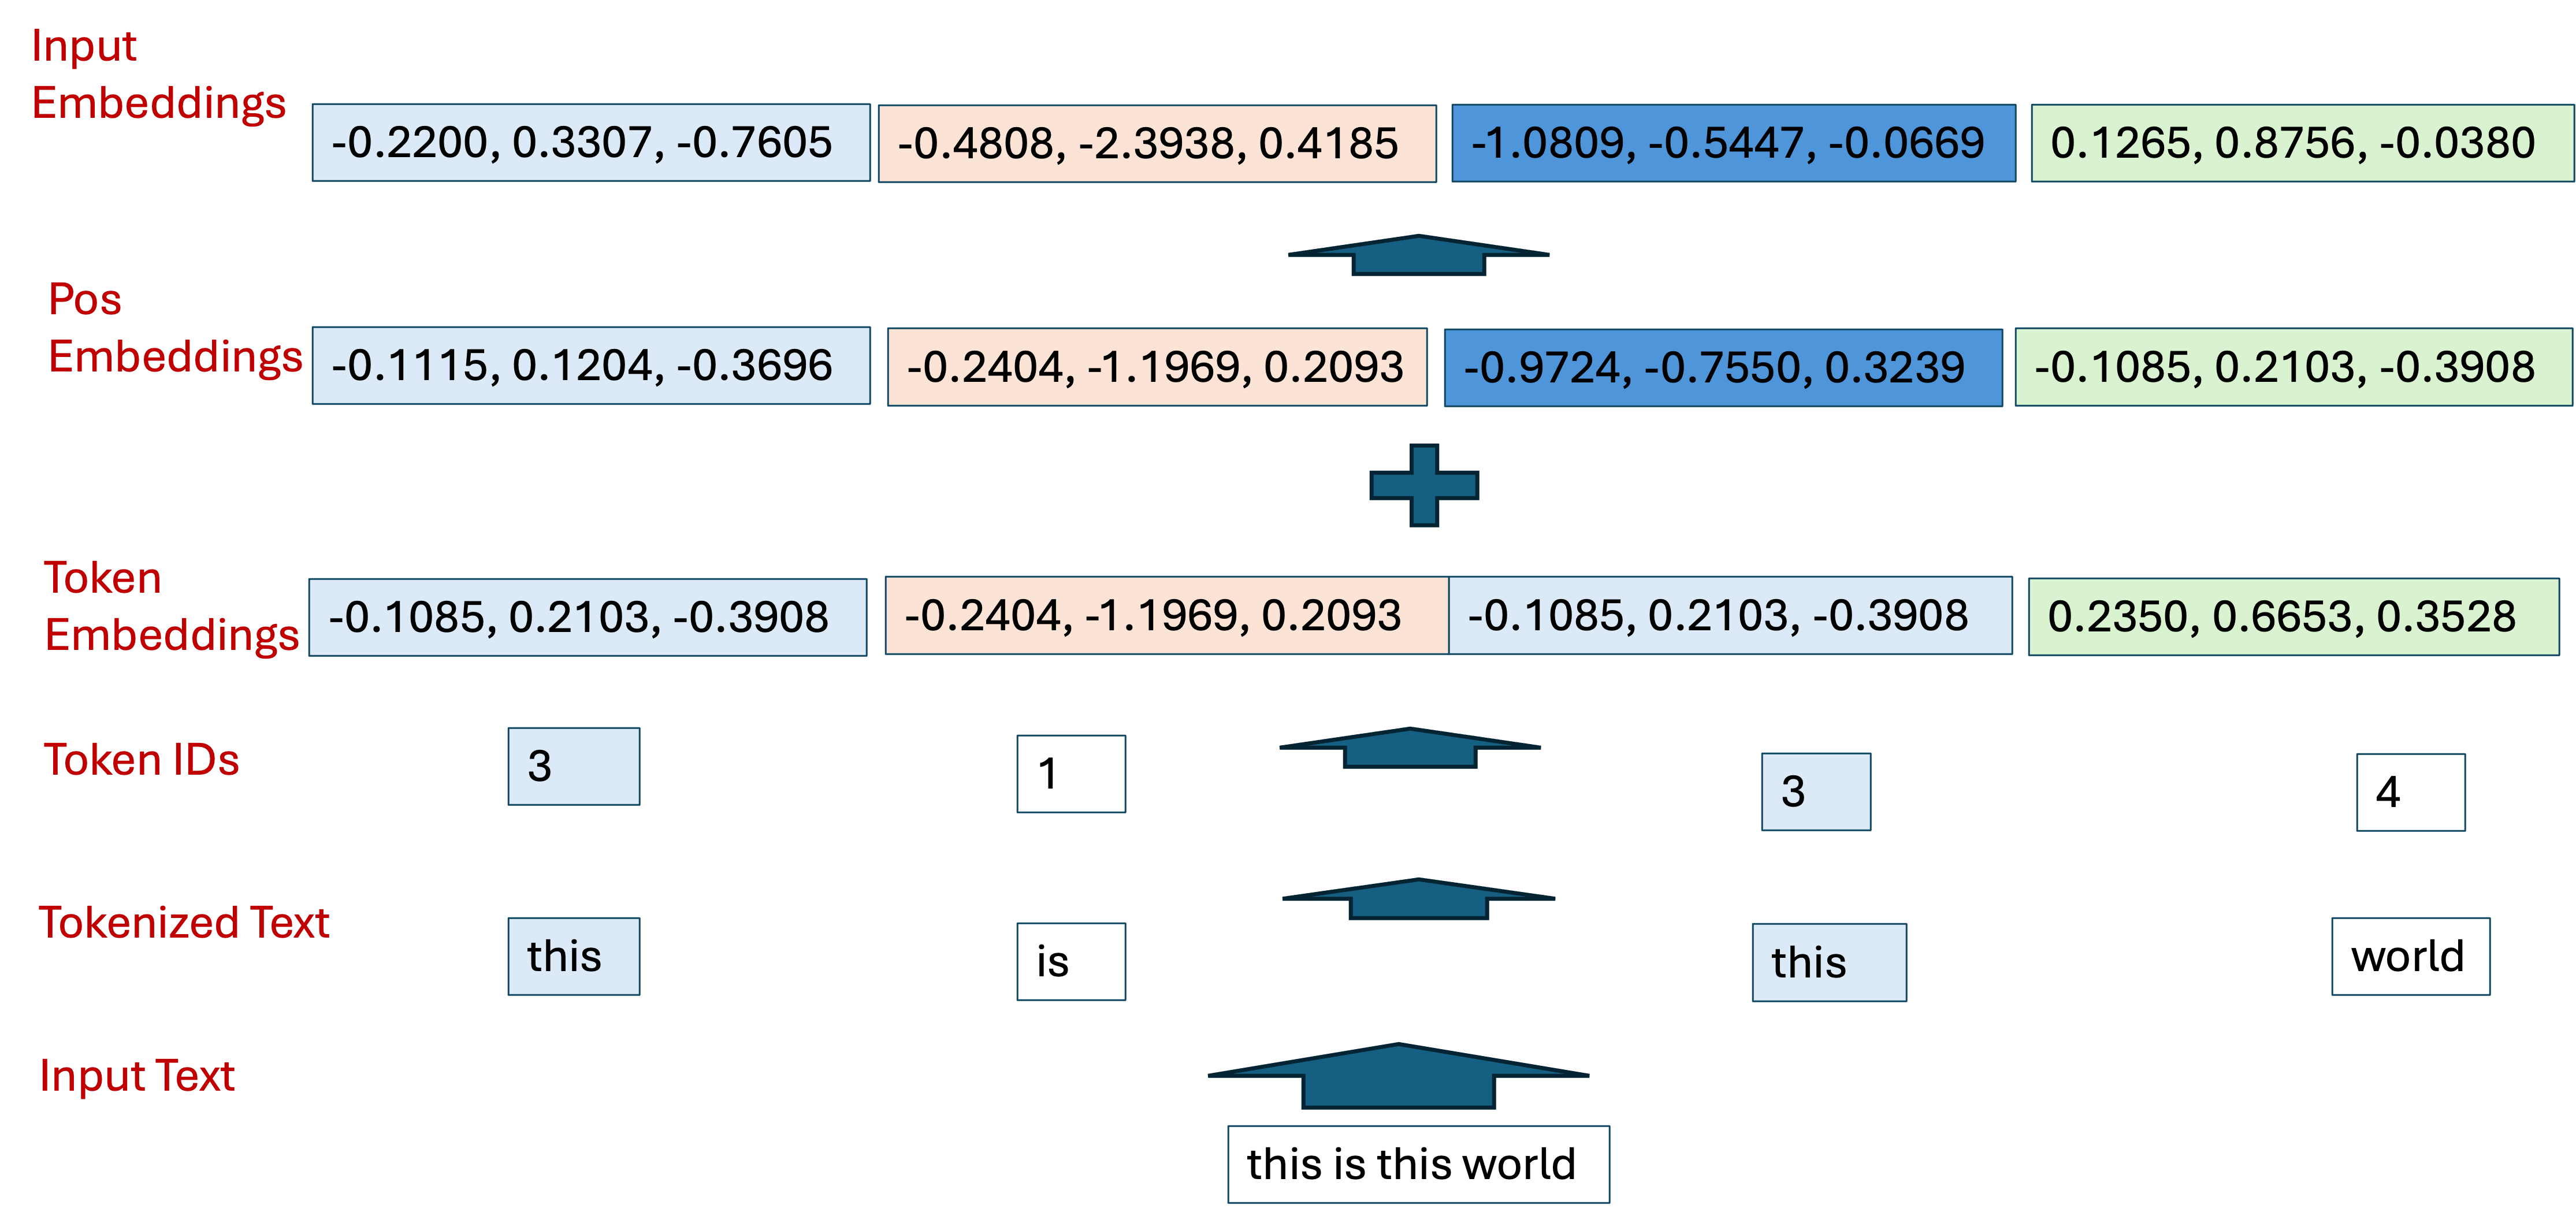




### STEP 5 : Incorporate Positional Embeddings (Absolute)


#### Step 5 a) Generate  Token Embeddings via look up 

In [28]:
# Consider the text 
text = "this is this world"


# generate token ids
input_ids = torch.tensor(encode(text, vocab))


# check 
print(input_ids)

# get the token embeddings
token_embeddings = embedding_layer(input_ids)


# print token embeddings 
print(token_embeddings)




tensor([3, 1, 3, 4])
tensor([[-0.1085,  0.2103, -0.3908],
        [-0.2404, -1.1969,  0.2093],
        [-0.1085,  0.2103, -0.3908],
        [ 0.2350,  0.6653,  0.3528]], grad_fn=<EmbeddingBackward0>)


#### Step 5 b) Generate   Additional Embeddings layer for position embedding 

- We keep the context length as 4 - Note the positional embeddings need to differentiate tokens based on the position they are present in the input sequence 

- We keep the embeddings vector size to be 3 like before 



In [29]:
import torch 

# Set context Length 
context_length = 4

# Set size of embedding vector 
output_dim = 3

# Create another embedding matrix for position embeddings 
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

# # Instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility purposes:
torch.manual_seed(123)

# get pos embeddings for input positions [0,1,2,3]
pos_embeddings = pos_embedding_layer(torch.arange(context_length))

# check shape of pos embedding matrix 
print(pos_embeddings.shape)
print("                      ")

# check the embedding vectors for each pos 
for i in torch.arange(context_length):
    print(f' For the {i} th position) the embedding vector is -> ')

    print(pos_embeddings[i])
    print("                      ")
    print("                      ")

print("The whole pos embedding matrix is ")
print("                                  ")
print(pos_embeddings)


torch.Size([4, 3])
                      
 For the 0 th position) the embedding vector is -> 
tensor([-0.1115,  0.1204, -0.3696], grad_fn=<SelectBackward0>)
                      
                      
 For the 1 th position) the embedding vector is -> 
tensor([-0.2404, -1.1969,  0.2093], grad_fn=<SelectBackward0>)
                      
                      
 For the 2 th position) the embedding vector is -> 
tensor([-0.9724, -0.7550,  0.3239], grad_fn=<SelectBackward0>)
                      
                      
 For the 3 th position) the embedding vector is -> 
tensor([-0.1085,  0.2103, -0.3908], grad_fn=<SelectBackward0>)
                      
                      
The whole pos embedding matrix is 
                                  
tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239],
        [-0.1085,  0.2103, -0.3908]], grad_fn=<EmbeddingBackward0>)


#### Step 5 c) Add token embeddings to positional  embeddings to create Input embeddings 

In [30]:
# get input embeddings 
input_embeddings = token_embeddings + pos_embeddings

print(" TOKEN       EMBEDDINGS MATRIX ")
print("                         ")
print(token_embeddings)
print("                         ")


print(" POSITIONAL  EMBEDDINGS MATRIX ")
print("                         ")
print(pos_embeddings)
print("                         ")


print(" INPUT       EMBEDDINGS MATRIX ")
print("                         ")
print(input_embeddings)
print("                         ")



 TOKEN       EMBEDDINGS MATRIX 
                         
tensor([[-0.1085,  0.2103, -0.3908],
        [-0.2404, -1.1969,  0.2093],
        [-0.1085,  0.2103, -0.3908],
        [ 0.2350,  0.6653,  0.3528]], grad_fn=<EmbeddingBackward0>)
                         
 POSITIONAL  EMBEDDINGS MATRIX 
                         
tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239],
        [-0.1085,  0.2103, -0.3908]], grad_fn=<EmbeddingBackward0>)
                         
 INPUT       EMBEDDINGS MATRIX 
                         
tensor([[-0.2200,  0.3307, -0.7605],
        [-0.4808, -2.3938,  0.4185],
        [-1.0809, -0.5447, -0.0669],
        [ 0.1265,  0.8756, -0.0380]], grad_fn=<AddBackward0>)
                         


## End of Notebook